In [7]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# load nmc_met_io for retrieving micaps server data
import sys
print(sys.path)
sys.path.insert(0, "/home/x711/code/nmc_met_io") # .append("/home/x711/code/nmc_met_io")
print(sys.path)

from nmc_met_io.retrieve_cassandraDB  import *


xr.set_options(display_style="text")

['/home/x711/code/nmc_met_io', '/home/x711/code/ec', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']
['/home/x711/code/nmc_met_io', '/home/x711/code/nmc_met_io', '/home/x711/code/ec', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']


## 1.1 读取多个时次的模式预报数据 TEMP

In [9]:
%time
directory850 = "ECMWF_HR/TMP/850"
directory500 = "ECMWF_HR/TMP/500"
fhours = np.arange(0, 168, 24)
filenames = ['22061720.'+'%03d'%(fhour) for fhour in fhours]
T850 = get_model_grids(directory850, filenames, varname='T', varattrs={'long_name':'850hPa T', 'units':'℃'}, cache=False)
T500 = get_model_grids(directory500, filenames, varname='T', varattrs={'long_name':'500hPa T', 'units':'℃'}, cache=False)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


In [10]:
T850

<xarray.Dataset>
Dimensions:                  (time: 7, level: 1, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-17T20:00:00 ... 20...
  * level                    (level) float32 850.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2022-06-17T20:00:00
    forecast_period          (time) float64 0.0 24.0 48.0 72.0 96.0 120.0 144.0
Data variables:
    T                        (time, level, lat, lon) float32 16.98 ... 10.68
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

<xarray.DataArray 'T' (time: 7, lat: 120, lon: 160)>
array([[[24.718994, 24.406494, 23.89087 , ..., 24.593994, 24.851807,
         24.898682],
        [24.461182, 24.000244, 23.820557, ..., 24.601807, 24.804932,
         25.125244],
        [23.82837 , 23.945557, 24.179932, ..., 24.76587 , 24.711182,
         25.218994],
        ...,
        [31.773666, 32.742416, 34.015854, ..., 25.218994, 25.070557,
         24.820557],
        [32.63304 , 34.453354, 35.10179 , ..., 25.414307, 25.383057,
         25.226807],
        [32.797104, 34.87523 , 34.75023 , ..., 25.554932, 25.476807,
         25.367432]],

       [[23.378967, 23.253967, 22.85553 , ..., 24.832092, 24.832092,
         24.683655],
        [23.808655, 23.660217, 22.98053 , ..., 24.925842, 24.910217,
         24.839905],
        [24.097717, 23.964905, 23.29303 , ..., 25.089905, 24.863342,
         24.82428 ],
...
        [35.58606 , 36.937622, 38.937622, ..., 29.820435, 29.328247,
         28.671997],
        [34.046997, 36.92199

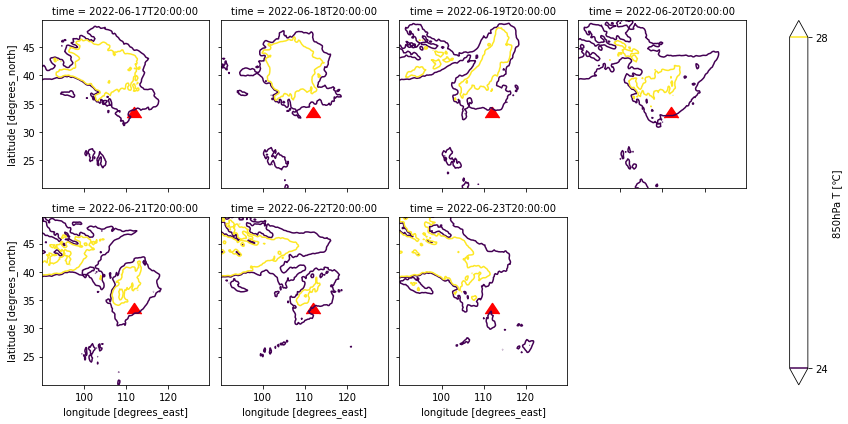

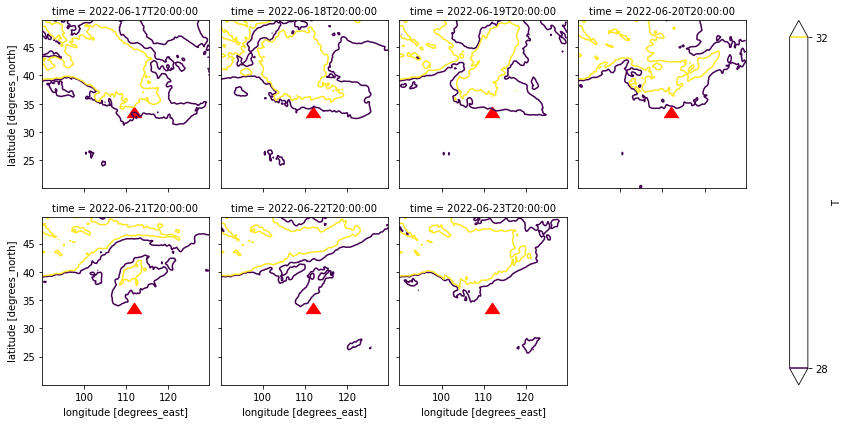

In [11]:
# 绘制图像
left = 90
right=130
top = 50
bottom = 20

T850 = T850.T.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")
p = T850.plot.contour(col='time', col_wrap=4, levels=[24, 28],add_colorbar=True)

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)


T500 = T500.T.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")
T850_500 = T850 - T500
print(T850_500)

p = T850_500.plot.contour(col='time', col_wrap=4, levels=[28, 32],add_colorbar=True)

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)

## 1.2 High Temperature Plot

In [12]:
plot850 = get_station_data("UPPER_AIR/PLOT/850", "20220623080000.000", dropna=True, cache=False)

plot850 = plot850.dropna(how='any')
plot850 = plot850[(bottom <= plot850['lat']) & (plot850['lat'] <= top) &
                    (left <= plot850['lon']) & (plot850['lon'] <= right)]
                    
plot850

,ID,lon,lat,Alt,Wind_angle,Wind_speed,Dewpoint_depression,Geopotential_hight,Temp,time
3,53772,112.580002,37.619999,777.500000,347.0,6.5,5.800000,144.699997,19.000000,2022-06-23 08:00:00
6,54292,129.500000,42.869999,258.000000,244.0,10.3,4.500000,141.800003,16.100000,2022-06-23 08:00:00
9,53798,114.360001,37.180000,184.199997,351.0,6.6,5.700000,142.399994,19.500000,2022-06-23 08:00:00
10,59431,108.550003,22.780001,153.300003,205.0,15.8,1.200000,150.899994,18.700001,2022-06-23 08:00:00
14,52267,101.059998,41.959999,940.200012,323.0,5.0,38.599998,144.699997,28.900000,2022-06-23 08:00:00
...,...,...,...,...,...,...,...,...,...,...
223,58847,119.230003,26.100000,112.099998,225.0,13.2,8.300000,152.100006,21.299999,2022-06-23 08:00:00
228,52203,93.519997,42.799999,745.799988,249.0,1.7,33.900002,144.600006,28.400000,2022-06-23 08:00:00
231,57328,107.510002,31.209999,344.899994,221.0,5.6,0.000000,144.399994,21.500000,2022-06-23 08:00:00
239,58362,121.440002,31.389999,6.700000,253.0,15.2,1.700000,147.899994,19.299999,2022-06-23 08:00:00


/tmp/ipykernel_5044/1315680653.py:7: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  cntr = ax.tricontour(plot850.lon, plot850.lat, plot850.Temp, levels=levels, add_colorbar=True)


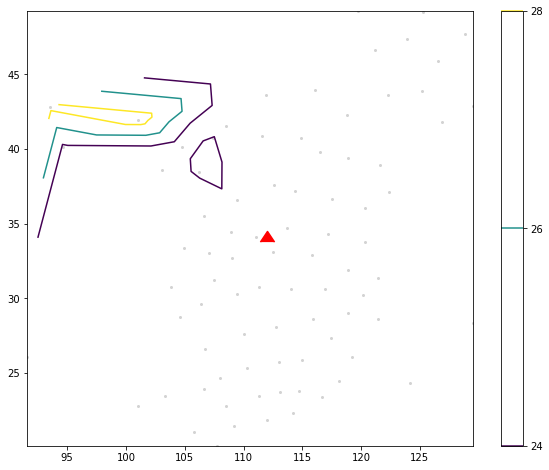

In [14]:
# plot:
fig, ax = plt.subplots(figsize=(10, 8))

levels = [24, 26, 28]

ax.plot(plot850.lon, plot850.lat, 'o', markersize=2, color='lightgrey')
cntr = ax.tricontour(plot850.lon, plot850.lat, plot850.Temp, levels=levels, add_colorbar=True)

ax.scatter(112, 34.5, s=200, c='red', marker=6)

fig.colorbar(cntr, ax=ax)

## 1.3 Draw Temp Diff

In [15]:
dti = pd.date_range("2022-06-22 20:00", periods=6, freq="-12H").to_series()

filenames = dti.dt.strftime("%y%m%d%H")


directory850 = "ECMWF_HR/TMP/850"
fhours = np.arange(12, 12*7, 12)
filenames = filenames + '.' + ['%03d'%(fhour) for fhour in fhours]

print(filenames)

T850 = get_model_grids(directory850, filenames, varname='TEMP', varattrs={'long_name':'850hPa TEMP', 'units':'C'}, cache=False)

T850

2022-06-22 20:00:00    22062220.012
2022-06-22 08:00:00    22062208.024
2022-06-21 20:00:00    22062120.036
2022-06-21 08:00:00    22062108.048
2022-06-20 20:00:00    22062020.060
2022-06-20 08:00:00    22062008.072
Freq: -12H, dtype: object


<xarray.Dataset>
Dimensions:                  (time: 6, level: 1, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-23T08:00:00 ... 20...
  * level                    (level) float32 850.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  (time) datetime64[ns] 2022-06-22T20:00:00 ... 20...
    forecast_period          (time) float64 12.0 24.0 36.0 48.0 60.0 72.0
Data variables:
    TEMP                     (time, level, lat, lon) float32 15.4 ... 10.19
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

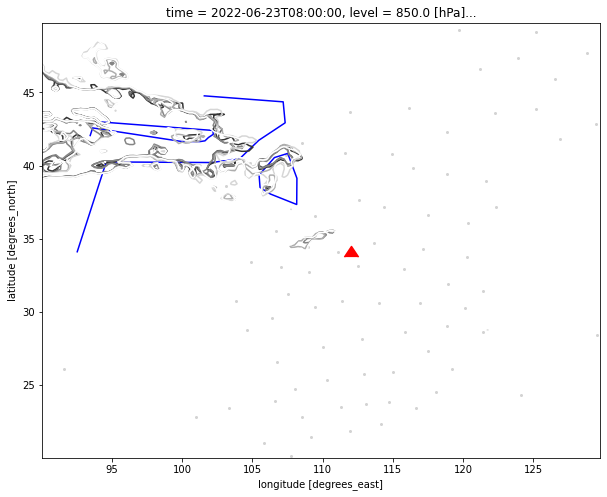

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

levels = [24, 28, 32]

ax.plot(plot850.lon, plot850.lat, 'o', markersize=2, color='lightgrey')
cntr = ax.tricontour(plot850.lon, plot850.lat, plot850.Temp, levels=levels, colors = 'blue') #add_colorbar=True

#fig.colorbar(cntr, ax=ax)
ax.scatter(112, 34.5, s=200, c='red', marker=6)

T850Area = T850.TEMP.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")

for index in range(0,6):
    colors = index/5 * (1-0.2) + 0.2
    T850Area.isel(time=index).plot.contour(ax = ax, levels=levels, colors = str(colors) )
    pass